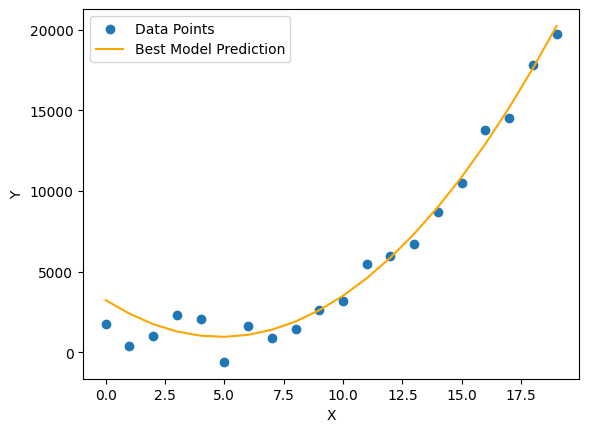

(2, None, np.float64(0.9161160492211387), 0.9576519439569722)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Constants
a, b, c, d = 3, 0, 1, 2
np.random.seed(0)

# Generate data
x = np.arange(0, 20)
y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, 1000, 20)

# Reshape x for model compatibility
x = x.reshape(-1, 1)

# Split data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize storage for model evaluation
best_model = None
best_score = -np.inf
best_degree = None
best_mlp_architecture = None
results = {}

# Test polynomial regression (degrees 1 to 4)
for degree in range(1, 5):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    avg_score = scores.mean()
    results[f'Poly degree {degree}'] = avg_score
    
    # Check if this model is better
    if avg_score > best_score:
        best_score = avg_score
        best_model = model
        best_degree = degree
        best_mlp_architecture = None  # Resetting as this is polynomial

# Test MLP with 1-3 hidden layers of different sizes
for layers in [(10,), (10, 10), (10, 10, 10)]:
    model = MLPRegressor(hidden_layer_sizes=layers, solver='lbfgs', max_iter=10000, random_state=42)
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    avg_score = scores.mean()
    results[f'MLP layers {layers}'] = avg_score

    # Check if this model is better
    if avg_score > best_score:
        best_score = avg_score
        best_model = model
        best_mlp_architecture = layers
        best_degree = None  # Resetting as this is MLP

# Fit the best model
best_model.fit(x_train, y_train)

# Evaluate and predict
r2_score = best_model.score(x_test, y_test)
y_pred = best_model.predict(x)

# Plot the data points and model prediction
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, label='Best Model Prediction', color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Output results
best_degree, best_mlp_architecture, best_score, r2_score